+### Introduction:

In this project, we are going to use fake advertising dataset, to indicate whether an user clicked on the advertisement on a business website. We will try to use appropriate model to predict the posibility based on the independent features of that user. 

#### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot

##### Importing Dataset

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1RfZ_OzVSZUmQxyK7YK6bNG1yqCmGMOGB5bfIJRYF9g0/gviz/tq?tqx=out:csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


##### Some Exploratory Data Analysis

Text(0.5, 0, 'Age')

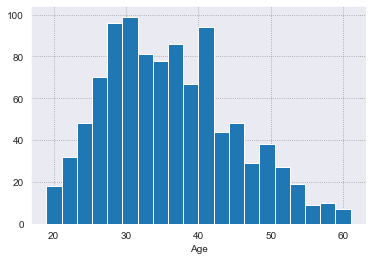

In [6]:
sns.set_style('darkgrid', {'grid.color': '.6', 'grid.linestyle' : ':'})
df['Age'].hist(bins = 20)
plt.xlabel("Age")

# 

*Conclusion from the graph*

1. we can see that 'Age' feature is following normal distribution curve as it should in any natural case
2. Most people in the dataset lies between the age of 25 and 45

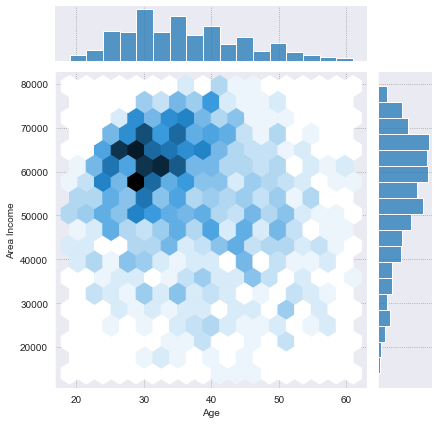

In [7]:
sns.jointplot(x = 'Age', y = 'Area Income', data = df, color = None, kind = 'hex')

*Conclusion from the graph*
1. Most people aged between 23 and 45 have income between 45,000 to 75,000

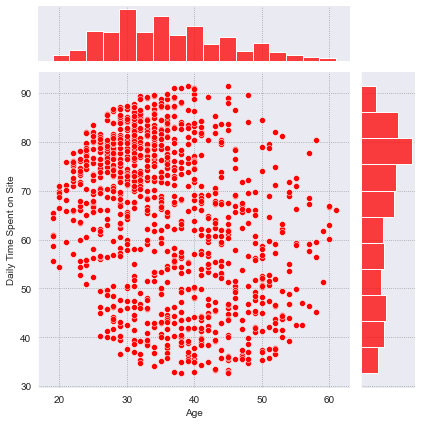

In [8]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = df, color = 'red', kind = 'scatter')

*Conclusion from the graph*
1. We can see most data points in the graph are concentrated between age 23 to 45.
2. That age group seems to spend more time on website than any other age group.

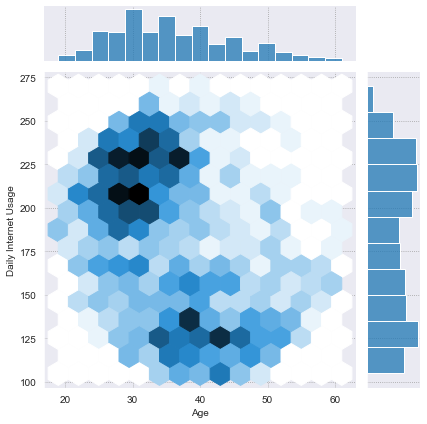

In [9]:
sns.jointplot(x = 'Age', y = 'Daily Internet Usage', data = df, kind = 'hex')

*Conclusion from the graph*
1. Most people between the age 23 to 35 are seem to use more internet than any other age group.
2. This conclusion also corresponds to the conclusion dereived from the abve graph. 

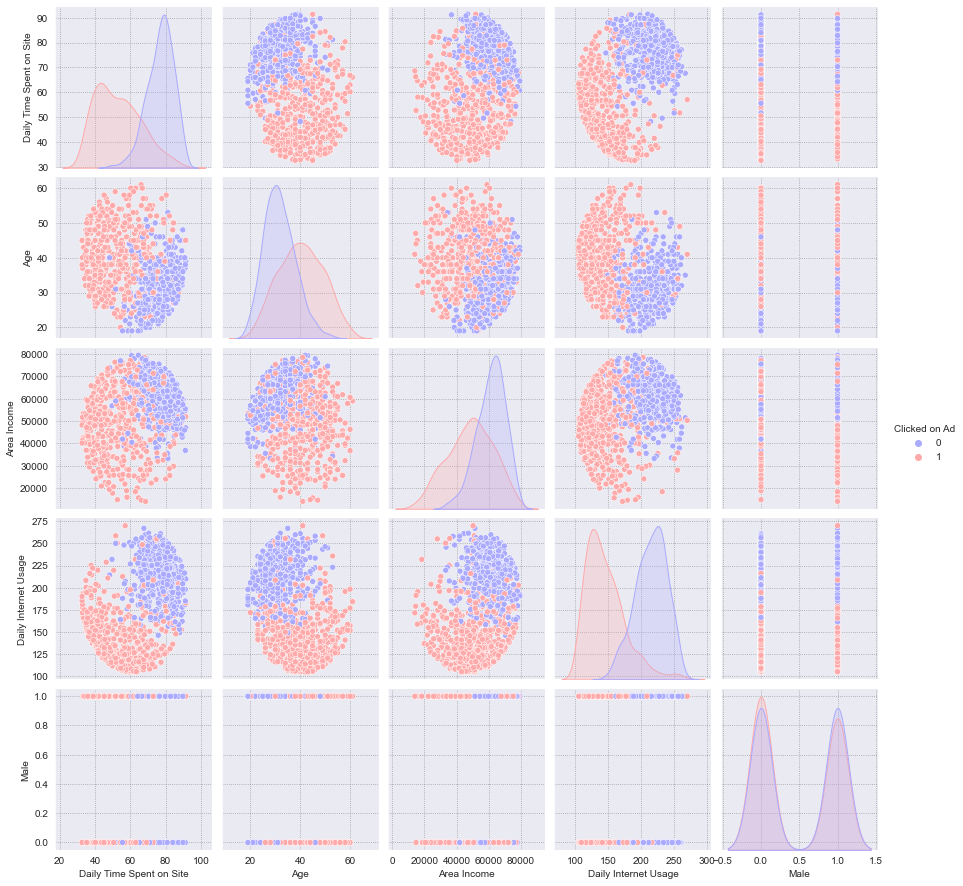

In [10]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')


#### Creating a model

In this classification model we are going to use Logistic Regression Model.

In [16]:
X = df.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'] , axis = 1)
y = df['Clicked on Ad']


y.info()
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Clicked on Ad
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
model.score(X_test, y_test)

0.905

In [22]:
predictions = model.predict(X_test)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       103
           1       0.94      0.86      0.90        97

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



<AxesSubplot:>

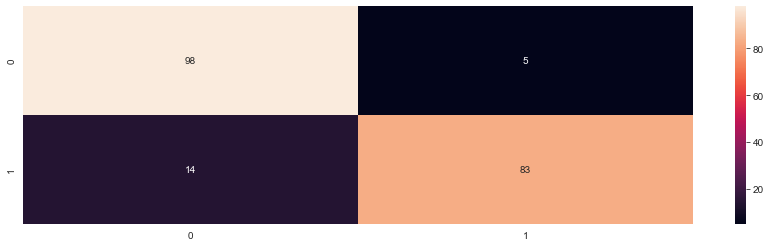

In [25]:
fig, ax = pyplot.subplots(figsize=(15,4))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt = '.3g')